#In this problem, first, we want to implement a baseline neural network classification model, and then improve it.
write your code in the provided area.

# Importing required packages

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Load and preprocess the Fashion MNIST dataset from torchvision package

In [92]:
#Your code
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_data = datasets.FashionMNIST(root = "C:\\Users\\ASUS", download = False, train = True, transform = transform)
test_data = datasets.FashionMNIST(root = "C:\\Users\\ASUS", download = False, train = False, transform = transform)

#Your code

# Split dataset into train, validation, and test sets(80 percent for training dataset)

In [95]:
#Your code
train_size = int(0.8*len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])
#Your code

# Create Data loaders for training, validation, and test sets.

In [98]:
#Your code
train_dataloader = DataLoader(train_data, shuffle = True, batch_size = 64)
val_dataloader = DataLoader(val_data, shuffle = False, batch_size = 64)
test_dataloader = DataLoader(test_data, shuffle = False, batch_size = 64)
#Your code

# Visualize some samples from each each class

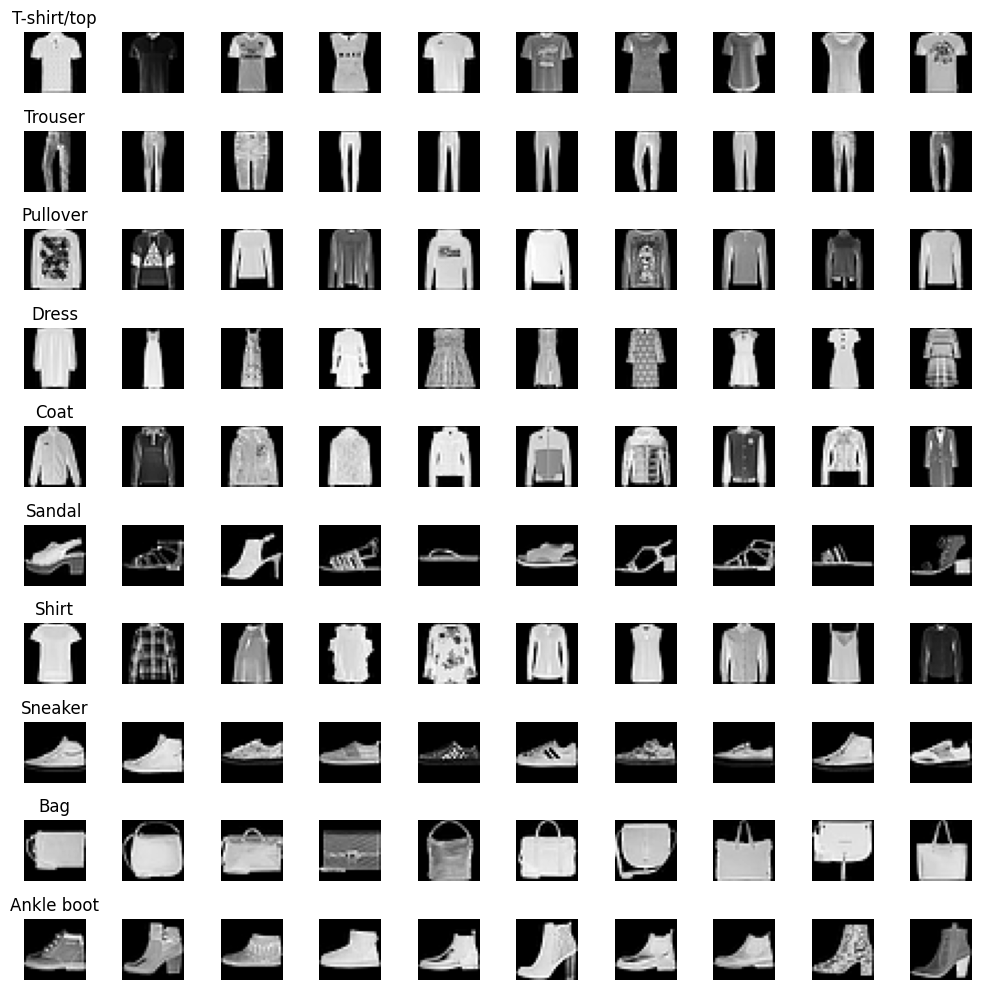

In [114]:
#Your code

class_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

plt.figure(figsize=(10, 10))
num_classes = 10
samples_per_class = 10
count = 0

for i in range(num_classes):
    
    indices = [j for j, (_, label) in enumerate(train_data) if label == i]
    
    selected_indices = torch.randperm(len(indices))[:samples_per_class]
    
    for j, idx in enumerate(selected_indices):
        
        plt.subplot(num_classes, samples_per_class, count + 1)
        plt.imshow(train_data[indices[idx]][0].squeeze(), cmap='gray')
        plt.axis('off')
        
        if j == 0:
            plt.title(class_names[i])
        count += 1

plt.tight_layout()
plt.show()

#Your code

# Define a simple neural network (MLP) without convolution layers

In [13]:
#Your code
class ReLUModel(nn.Module):

    def __init__(self):
        super(ReLUModel, self).__init__()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [14]:
#Your code
class TanhModel(nn.Module):

    def __init__(self):
        super(TanhModel, self).__init__()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(512, 256)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(256, 128)
        self.tanh3 = nn.Tanh()
        self.fc4 = nn.Linear(128, 64)
        self.tanh4 = nn.Tanh()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.tanh1(x)
        x = self.fc2(x)
        x = self.tanh2(x)
        x = self.fc3(x)
        x = self.tanh3(x)
        x = self.fc4(x)
        x = self.tanh4(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

# Define your loss function, and optimizer

In [16]:
#Your code

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relu_model = ReLUModel().to(device)
tanh_model = TanhModel().to(device)
criterion = nn.CrossEntropyLoss()
relu_optimizer = optim.Adam(relu_model.parameters(), lr = 0.001)
tanh_optimizer = optim.Adam(tanh_model.parameters(), lr = 0.001)

#Your code

#Train two models: one using the ReLU activation function and the other using the Tanh activation function, while keeping all other parameters the same. Finally, report the accuracies on the test dataset.

#In one figure, plot the loss over epochs for both the training and validation sets. In a separate figure, plot the accuracy over epochs for the training and validation sets for both models.(At the end, you should have 4 figures)

#How do the models differ in terms of performance?

In this case MLP using Tanh activation function had higher accuracies on training, validation and test datasets rather than using ReLu activation function.

In [18]:
#Your code
num_epochs = 30

relu_train_losses = []
tanh_train_losses = []

relu_train_accs = []
tanh_train_accs = []


relu_val_losses = []
tanh_val_losses = []

relu_val_accs = []
tanh_val_accs = []


for epoch in range(num_epochs):

    relu_train_loss = 0
    relu_train_acc = 0

    tanh_train_loss = 0
    tanh_train_acc = 0
    
    for images, labels in tqdm(train_dataloader, desc = f"Epoch {epoch + 1}/{num_epochs}"):

        images, labels = images.to(device), labels.to(device)
        
        relu_optimizer.zero_grad()
        tanh_optimizer.zero_grad()
        
        relu_outputs = relu_model.forward(images)
        tanh_outputs = tanh_model.forward(images)

        relu_loss = criterion(relu_outputs, labels)
        tanh_loss = criterion(tanh_outputs, labels)
        
        relu_loss.backward()
        tanh_loss.backward()
        
        relu_optimizer.step()
        tanh_optimizer.step()

        relu_train_loss += relu_loss
        tanh_train_loss += tanh_loss

        relu_train_acc += (torch.argmax(relu_outputs, dim = 1) == labels).sum()
        tanh_train_acc += (torch.argmax(tanh_outputs, dim = 1) == labels).sum()

    relu_train_losses.append(relu_train_loss.item() / len(train_data))
    tanh_train_losses.append(tanh_train_loss.item() / len(train_data))

    relu_train_accs.append(relu_train_acc.item() / len(train_data) * 100)
    tanh_train_accs.append(tanh_train_acc.item() / len(train_data) * 100)        

    print("epoch =", epoch + 1)
    print("relu_train_loss =", relu_train_losses[-1], "relu_train_acc =", relu_train_accs[-1])
    print("tanh_train_loss =", tanh_train_losses[-1], "tanh_train_acc =", tanh_train_accs[-1])

    with torch.no_grad():

        relu_val_loss = 0
        tanh_val_loss = 0
        
        relu_val_acc = 0
        tanh_val_acc = 0
    
        for images, labels in val_dataloader:
            
            images, labels = images.to(device), labels.to(device)
            
            relu_outputs = relu_model.forward(images)
            tanh_outputs = tanh_model.forward(images)
            
            relu_loss = criterion(relu_outputs, labels)
            tanh_loss = criterion(tanh_outputs, labels)
    
            
            relu_val_loss += relu_loss
            tanh_val_loss += tanh_loss
            
            relu_val_acc += (torch.argmax(relu_outputs, dim = 1) == labels).sum()
            tanh_val_acc += (torch.argmax(tanh_outputs, dim = 1) == labels).sum()
            
        print("relu_val_loss =", relu_val_loss.item() / len(val_data), "relu_val_acc =", relu_val_acc.item() / len(val_data) * 100)
        print("tanh_val_loss =", tanh_val_loss.item() / len(val_data), "tanh_val_acc =", tanh_val_acc.item() / len(val_data) * 100)

        relu_val_losses.append(relu_val_loss.item() / len(val_data))
        tanh_val_losses.append(tanh_val_loss.item() / len(val_data))

        relu_val_accs.append(relu_val_acc.item() / len(val_data) * 100)
        tanh_val_accs.append(tanh_val_acc.item() / len(val_data) * 100)
    
#Your code

Epoch 1/30: 100%|██████████| 750/750 [00:14<00:00, 51.17it/s]


epoch = 1
relu_train_loss = 0.027725255330403646 relu_train_acc = 68.86875
tanh_train_loss = 0.026998489379882813 tanh_train_acc = 74.51666666666667
relu_val_loss = 0.027277074178059895 relu_val_acc = 72.10833333333333
tanh_val_loss = 0.026139325459798177 tanh_val_acc = 79.46666666666667


Epoch 2/30: 100%|██████████| 750/750 [00:13<00:00, 53.98it/s]


epoch = 2
relu_train_loss = 0.027117474873860677 relu_train_acc = 72.5
tanh_train_loss = 0.0260718256632487 tanh_train_acc = 79.35624999999999
relu_val_loss = 0.026530863444010417 relu_val_acc = 76.67500000000001
tanh_val_loss = 0.025942769368489584 tanh_val_acc = 80.44166666666666


Epoch 3/30: 100%|██████████| 750/750 [00:13<00:00, 56.41it/s]


epoch = 3
relu_train_loss = 0.026225618998209636 relu_train_acc = 78.21041666666667
tanh_train_loss = 0.025826558430989584 tanh_train_acc = 80.77499999999999
relu_val_loss = 0.026487035115559898 relu_val_acc = 76.86666666666667
tanh_val_loss = 0.026009628295898438 tanh_val_acc = 80.11666666666667


Epoch 4/30: 100%|██████████| 750/750 [00:13<00:00, 56.29it/s]


epoch = 4
relu_train_loss = 0.02592145029703776 relu_train_acc = 80.12291666666667
tanh_train_loss = 0.02572442626953125 tanh_train_acc = 81.48333333333333
relu_val_loss = 0.026017161051432293 relu_val_acc = 80.025
tanh_val_loss = 0.026023160298665363 tanh_val_acc = 79.96666666666667


Epoch 5/30: 100%|██████████| 750/750 [00:11<00:00, 63.76it/s]


epoch = 5
relu_train_loss = 0.025644978841145832 relu_train_acc = 81.96041666666667
tanh_train_loss = 0.025616546630859376 tanh_train_acc = 82.14791666666666
relu_val_loss = 0.02609587097167969 relu_val_acc = 79.425
tanh_val_loss = 0.02571911112467448 tanh_val_acc = 81.89166666666667


Epoch 6/30: 100%|██████████| 750/750 [00:11<00:00, 63.14it/s]


epoch = 6
relu_train_loss = 0.025608078002929687 relu_train_acc = 82.18124999999999
tanh_train_loss = 0.025581563313802083 tanh_train_acc = 82.36041666666667
relu_val_loss = 0.02574128214518229 relu_val_acc = 81.79166666666666
tanh_val_loss = 0.025811495463053384 tanh_val_acc = 81.30833333333334


Epoch 7/30: 100%|██████████| 750/750 [00:11<00:00, 62.85it/s]


epoch = 7
relu_train_loss = 0.02572339121500651 relu_train_acc = 81.45833333333333
tanh_train_loss = 0.0255601806640625 tanh_train_acc = 82.51458333333333
relu_val_loss = 0.026446032206217447 relu_val_acc = 77.275
tanh_val_loss = 0.025707427978515624 tanh_val_acc = 81.91666666666667


Epoch 8/30: 100%|██████████| 750/750 [00:11<00:00, 63.96it/s]


epoch = 8
relu_train_loss = 0.025632748921712238 relu_train_acc = 82.04375
tanh_train_loss = 0.02552538808186849 tanh_train_acc = 82.7375
relu_val_loss = 0.025959337870279948 relu_val_acc = 80.41666666666667
tanh_val_loss = 0.025639417012532553 tanh_val_acc = 82.425


Epoch 9/30: 100%|██████████| 750/750 [00:11<00:00, 63.75it/s]


epoch = 9
relu_train_loss = 0.025736239115397134 relu_train_acc = 81.36666666666666
tanh_train_loss = 0.025497268676757813 tanh_train_acc = 82.92500000000001
relu_val_loss = 0.02615099843343099 relu_val_acc = 79.14166666666667
tanh_val_loss = 0.02583026123046875 tanh_val_acc = 81.2


Epoch 10/30: 100%|██████████| 750/750 [00:12<00:00, 60.21it/s]


epoch = 10
relu_train_loss = 0.025689539591471355 relu_train_acc = 81.65208333333334
tanh_train_loss = 0.025419820149739585 tanh_train_acc = 83.37083333333334
relu_val_loss = 0.025959566752115887 relu_val_acc = 80.36666666666666
tanh_val_loss = 0.025640431722005207 tanh_val_acc = 82.44166666666666


Epoch 11/30: 100%|██████████| 750/750 [00:12<00:00, 60.51it/s]


epoch = 11
relu_train_loss = 0.025705406188964844 relu_train_acc = 81.57291666666666
tanh_train_loss = 0.025418853759765624 tanh_train_acc = 83.41666666666666
relu_val_loss = 0.026477892557779947 relu_val_acc = 77.10000000000001
tanh_val_loss = 0.02546738688151042 tanh_val_acc = 83.55


Epoch 12/30: 100%|██████████| 750/750 [00:11<00:00, 63.47it/s]


epoch = 12
relu_train_loss = 0.025579747517903647 relu_train_acc = 82.37916666666666
tanh_train_loss = 0.025379783630371095 tanh_train_acc = 83.65625
relu_val_loss = 0.025754676818847657 relu_val_acc = 81.72500000000001
tanh_val_loss = 0.025574455261230467 tanh_val_acc = 82.8


Epoch 13/30: 100%|██████████| 750/750 [00:11<00:00, 63.48it/s]


epoch = 13
relu_train_loss = 0.026141942342122394 relu_train_acc = 78.78958333333334
tanh_train_loss = 0.025349324544270833 tanh_train_acc = 83.86666666666667
relu_val_loss = 0.026132550557454427 relu_val_acc = 79.34166666666667
tanh_val_loss = 0.025659823099772137 tanh_val_acc = 82.26666666666667


Epoch 14/30: 100%|██████████| 750/750 [00:11<00:00, 63.46it/s]


epoch = 14
relu_train_loss = 0.025693784077962238 relu_train_acc = 81.66041666666666
tanh_train_loss = 0.025374440511067707 tanh_train_acc = 83.70833333333333
relu_val_loss = 0.026463841756184894 relu_val_acc = 77.125
tanh_val_loss = 0.02562752024332682 tanh_val_acc = 82.55833333333334


Epoch 15/30: 100%|██████████| 750/750 [00:11<00:00, 64.06it/s]


epoch = 15
relu_train_loss = 0.02585925038655599 relu_train_acc = 80.61041666666667
tanh_train_loss = 0.025362810770670572 tanh_train_acc = 83.76666666666667
relu_val_loss = 0.02574946085611979 relu_val_acc = 81.75833333333333
tanh_val_loss = 0.025538047790527343 tanh_val_acc = 83.075


Epoch 16/30: 100%|██████████| 750/750 [00:11<00:00, 63.72it/s]


epoch = 16
relu_train_loss = 0.02581170399983724 relu_train_acc = 80.90416666666667
tanh_train_loss = 0.025314109802246094 tanh_train_acc = 84.08333333333333
relu_val_loss = 0.02606336975097656 relu_val_acc = 79.75
tanh_val_loss = 0.02599548594156901 tanh_val_acc = 80.08333333333333


Epoch 17/30: 100%|██████████| 750/750 [00:11<00:00, 63.32it/s]


epoch = 17
relu_train_loss = 0.025834363301595054 relu_train_acc = 80.75625
tanh_train_loss = 0.025347913106282552 tanh_train_acc = 83.8625
relu_val_loss = 0.025983489990234376 relu_val_acc = 80.25
tanh_val_loss = 0.025615643819173178 tanh_val_acc = 82.575


Epoch 18/30: 100%|██████████| 750/750 [00:11<00:00, 63.81it/s]


epoch = 18
relu_train_loss = 0.02573590342203776 relu_train_acc = 81.39999999999999
tanh_train_loss = 0.025342328389485677 tanh_train_acc = 83.90625
relu_val_loss = 0.026602162679036458 relu_val_acc = 76.31666666666666
tanh_val_loss = 0.025619316101074218 tanh_val_acc = 82.54166666666667


Epoch 19/30: 100%|██████████| 750/750 [00:12<00:00, 61.59it/s]


epoch = 19
relu_train_loss = 0.026117169698079427 relu_train_acc = 78.93541666666667
tanh_train_loss = 0.025329821268717446 tanh_train_acc = 83.98958333333333
relu_val_loss = 0.025806068420410156 relu_val_acc = 81.39999999999999
tanh_val_loss = 0.025601486206054687 tanh_val_acc = 82.69999999999999


Epoch 20/30: 100%|██████████| 750/750 [00:12<00:00, 61.35it/s]


epoch = 20
relu_train_loss = 0.025938242594401043 relu_train_acc = 80.09375
tanh_train_loss = 0.02531866963704427 tanh_train_acc = 84.07916666666667
relu_val_loss = 0.026083951314290366 relu_val_acc = 79.60000000000001
tanh_val_loss = 0.02558636728922526 tanh_val_acc = 82.83333333333334


Epoch 21/30: 100%|██████████| 750/750 [00:12<00:00, 59.56it/s]


epoch = 21
relu_train_loss = 0.02569769032796224 relu_train_acc = 81.63958333333333
tanh_train_loss = 0.025283164978027343 tanh_train_acc = 84.25625
relu_val_loss = 0.025869049072265626 relu_val_acc = 80.975
tanh_val_loss = 0.02577721913655599 tanh_val_acc = 81.56666666666666


Epoch 22/30: 100%|██████████| 750/750 [00:12<00:00, 59.47it/s]


epoch = 22
relu_train_loss = 0.025845321655273437 relu_train_acc = 80.70416666666667
tanh_train_loss = 0.02523407999674479 tanh_train_acc = 84.60625
relu_val_loss = 0.025978233337402342 relu_val_acc = 80.29166666666666
tanh_val_loss = 0.02548717244466146 tanh_val_acc = 83.39166666666667


Epoch 23/30: 100%|██████████| 750/750 [00:12<00:00, 58.47it/s]


epoch = 23
relu_train_loss = 0.026004051208496092 relu_train_acc = 79.67916666666667
tanh_train_loss = 0.025230695088704427 tanh_train_acc = 84.625
relu_val_loss = 0.025987088521321616 relu_val_acc = 80.23333333333333
tanh_val_loss = 0.025569241841634116 tanh_val_acc = 82.875


Epoch 24/30: 100%|██████████| 750/750 [00:11<00:00, 64.15it/s]


epoch = 24
relu_train_loss = 0.025999623616536457 relu_train_acc = 79.70625
tanh_train_loss = 0.025241317749023436 tanh_train_acc = 84.54583333333333
relu_val_loss = 0.02597382609049479 relu_val_acc = 80.31666666666666
tanh_val_loss = 0.0255135498046875 tanh_val_acc = 83.20833333333333


Epoch 25/30: 100%|██████████| 750/750 [00:12<00:00, 60.59it/s]


epoch = 25
relu_train_loss = 0.026044840494791666 relu_train_acc = 79.41875
tanh_train_loss = 0.02522534942626953 tanh_train_acc = 84.65625
relu_val_loss = 0.025914169311523436 relu_val_acc = 80.72500000000001
tanh_val_loss = 0.025569681803385418 tanh_val_acc = 82.875


Epoch 26/30: 100%|██████████| 750/750 [00:13<00:00, 56.68it/s]


epoch = 26
relu_train_loss = 0.025772926330566406 relu_train_acc = 81.16458333333333
tanh_train_loss = 0.025249964396158855 tanh_train_acc = 84.47916666666667
relu_val_loss = 0.026197135925292967 relu_val_acc = 78.9
tanh_val_loss = 0.025520421346028645 tanh_val_acc = 83.15


Epoch 27/30: 100%|██████████| 750/750 [00:13<00:00, 56.56it/s]


epoch = 27
relu_train_loss = 0.02598333485921224 relu_train_acc = 79.82083333333333
tanh_train_loss = 0.025249908447265625 tanh_train_acc = 84.48750000000001
relu_val_loss = 0.025970606486002603 relu_val_acc = 80.36666666666666
tanh_val_loss = 0.025667833964029947 tanh_val_acc = 82.34166666666667


Epoch 28/30: 100%|██████████| 750/750 [00:13<00:00, 56.89it/s]


epoch = 28
relu_train_loss = 0.02599168650309245 relu_train_acc = 79.76458333333333
tanh_train_loss = 0.025251378377278647 tanh_train_acc = 84.49791666666667
relu_val_loss = 0.02652980041503906 relu_val_acc = 76.76666666666667
tanh_val_loss = 0.025964434305826824 tanh_val_acc = 80.45


Epoch 29/30: 100%|██████████| 750/750 [00:11<00:00, 64.27it/s]


epoch = 29
relu_train_loss = 0.02623907470703125 relu_train_acc = 78.17916666666666
tanh_train_loss = 0.02526817067464193 tanh_train_acc = 84.37916666666668
relu_val_loss = 0.02693975321451823 relu_val_acc = 74.175
tanh_val_loss = 0.025492225646972656 tanh_val_acc = 83.40833333333333


Epoch 30/30: 100%|██████████| 750/750 [00:11<00:00, 63.76it/s]


epoch = 30
relu_train_loss = 0.02643928527832031 relu_train_acc = 76.90416666666667
tanh_train_loss = 0.025241673787434894 tanh_train_acc = 84.50833333333333
relu_val_loss = 0.025982716878255208 relu_val_acc = 80.27499999999999
tanh_val_loss = 0.025518648783365884 tanh_val_acc = 83.14166666666667


In [19]:
relu_test_loss = 0
tanh_test_loss = 0

relu_test_acc = 0
tanh_test_acc = 0

with torch.no_grad():
    
    for images, labels in test_dataloader:
        
        images, labels = images.to(device), labels.to(device)
        
        relu_outputs = relu_model.forward(images)
        tanh_outputs = tanh_model.forward(images)
        
        relu_loss = criterion(relu_outputs, labels)
        tanh_loss = criterion(tanh_outputs, labels)
        
        relu_test_loss += relu_loss
        tanh_test_loss += tanh_loss
        
        relu_test_acc += (torch.argmax(relu_outputs, dim = 1) == labels).sum()
        tanh_test_acc += (torch.argmax(tanh_outputs, dim = 1) == labels).sum()
        
    print("relu_test_loss =", relu_test_loss.item() / len(test_data), "test_acc =", relu_test_acc.item() / len(test_data) * 100)
    print("tanh_test_loss =", tanh_test_loss.item() / len(test_data), "test_acc =", tanh_test_acc.item() / len(test_data) * 100)


relu_test_loss = 0.026017938232421874 test_acc = 80.36
tanh_test_loss = 0.025555250549316406 test_acc = 83.28


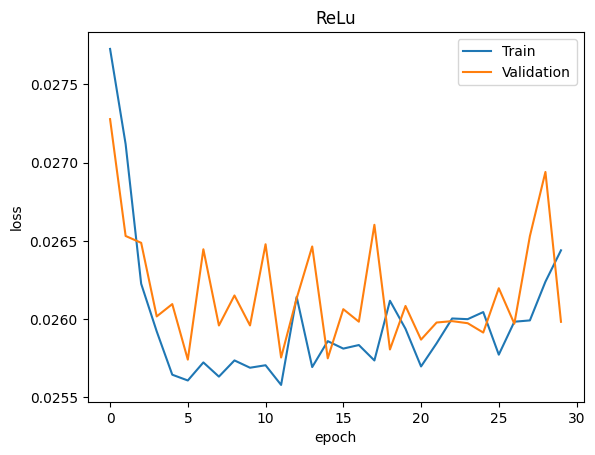

In [20]:
plt.plot(range(num_epochs), relu_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("ReLu")

plt.plot(range(num_epochs), relu_val_losses)

plt.legend(["Train", "Validation"])

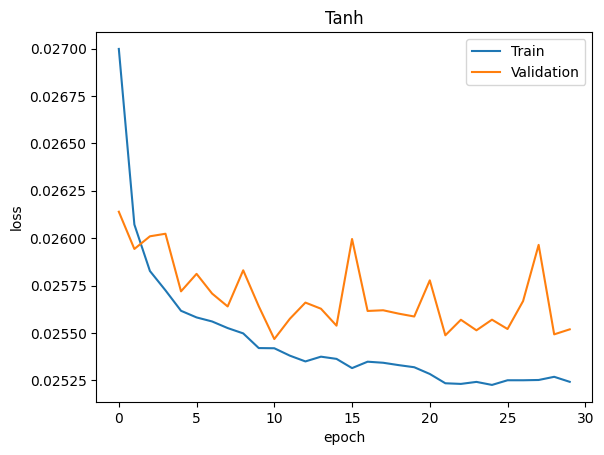

In [21]:
plt.plot(range(num_epochs), tanh_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Tanh")

plt.plot(range(num_epochs), tanh_val_losses)

plt.legend(["Train", "Validation"])

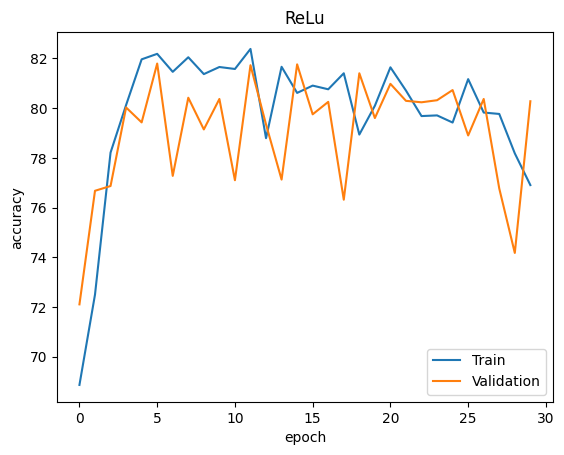

In [22]:
plt.plot(range(num_epochs), relu_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("ReLu")

plt.plot(range(num_epochs), relu_val_accs)

plt.legend(["Train", "Validation"])

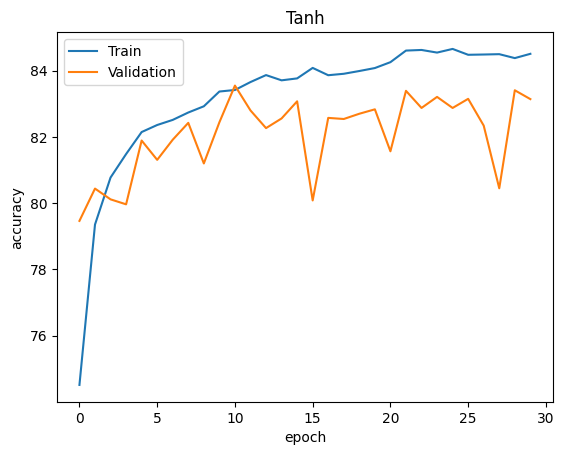

In [23]:
plt.plot(range(num_epochs), tanh_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Tanh")

plt.plot(range(num_epochs), tanh_val_accs)

plt.legend(["Train", "Validation"])

#What was the optimum number of epochs for training? why?
<br>
For MlP using ReLu activation function It was 4.
<br>
But in MlP using Tanh activation we still haven't reached to the optimum number of epochs.
<br>
All of this is due to that early stopping is a regularization technique.

#Repeat all the previous sections, but this time, add some convolutional layers to your model.

In [26]:
#Your code
class CNNReLUModel(nn.Module):

    def __init__(self):
        super(CNNReLUModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.relu3 = nn.ReLU()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(22 * 22 * 64, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu6 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu7 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.fc3(x)
        x = self.relu6(x)
        x = self.fc4(x)
        x = self.relu7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [27]:
#Your code
class CNNTanhModel(nn.Module):

    def __init__(self):
        super(CNNTanhModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.tanh1 = nn.Tanh()
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.tanh2 = nn.Tanh()
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.tanh3 = nn.Tanh()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(22 * 22 * 64, 512)
        self.tanh4 = nn.Tanh()
        self.fc2 = nn.Linear(512, 256)
        self.tanh5 = nn.Tanh()
        self.fc3 = nn.Linear(256, 128)
        self.tanh6 = nn.Tanh()
        self.fc4 = nn.Linear(128, 64)
        self.tanh7 = nn.Tanh()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.tanh1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.conv3(x)
        x = self.tanh3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.tanh4(x)
        x = self.fc2(x)
        x = self.tanh5(x)
        x = self.fc3(x)
        x = self.tanh6(x)
        x = self.fc4(x)
        x = self.tanh7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_relu_model = CNNReLUModel().to(device)
cnn_tanh_model = CNNTanhModel().to(device)
cnn_relu_optimizer = optim.Adam(cnn_relu_model.parameters(), lr = 0.001)
cnn_tanh_optimizer = optim.Adam(cnn_tanh_model.parameters(), lr = 0.001)

In [29]:
#Your code
num_epochs = 30

cnn_relu_train_losses = []
cnn_relu_train_accs = []

cnn_tanh_train_losses = []
cnn_tanh_train_accs = []


cnn_relu_val_losses = []
cnn_relu_val_accs = []

cnn_tanh_val_losses = []
cnn_tanh_val_accs = []


for epoch in range(num_epochs):

    cnn_relu_train_loss = 0
    cnn_relu_train_acc = 0

    cnn_tanh_train_loss = 0
    cnn_tanh_train_acc = 0
    
    for images, labels in tqdm(train_dataloader, desc = f"Epoch {epoch + 1}/{num_epochs}"):

        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_optimizer.zero_grad()
        cnn_tanh_optimizer.zero_grad()
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)

        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_loss.backward()
        cnn_tanh_loss.backward()
        
        cnn_relu_optimizer.step()
        cnn_tanh_optimizer.step()

        cnn_relu_train_loss += cnn_relu_loss
        cnn_tanh_train_loss += cnn_tanh_loss

        cnn_relu_train_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_train_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()

    cnn_relu_train_losses.append(cnn_relu_train_loss.item() / len(train_data))
    cnn_tanh_train_losses.append(cnn_tanh_train_loss.item() / len(train_data))

    cnn_relu_train_accs.append(cnn_relu_train_acc.item() / len(train_data) * 100)
    cnn_tanh_train_accs.append(cnn_tanh_train_acc.item() / len(train_data) * 100)        

    print("epoch =", epoch + 1)
    print("cnn_relu_train_loss =", cnn_relu_train_losses[-1], "cnn_relu_train_acc =", cnn_relu_train_accs[-1])
    print("cnn_tanh_train_loss =", cnn_tanh_train_losses[-1], "cnn_tanh_train_acc =", cnn_tanh_train_accs[-1])

    with torch.no_grad():

        cnn_relu_val_loss = 0
        cnn_tanh_val_loss = 0
        
        cnn_relu_val_acc = 0
        cnn_tanh_val_acc = 0

    
        for images, labels in val_dataloader:
            
            images, labels = images.to(device), labels.to(device)
            
            cnn_relu_outputs = cnn_relu_model.forward(images)
            cnn_tanh_outputs = cnn_tanh_model.forward(images)
            
            cnn_relu_loss = criterion(cnn_relu_outputs, labels)
            cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
    
            
            cnn_relu_val_loss += cnn_relu_loss
            cnn_tanh_val_loss += cnn_tanh_loss
            
            cnn_relu_val_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
            cnn_tanh_val_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
            
        print("cnn_relu_val_loss =", cnn_relu_val_loss.item() / len(val_data), "cnn_relu_val_acc =", cnn_relu_val_acc.item() / len(val_data) * 100)
        print("cnn_tanh_val_loss =", cnn_tanh_val_loss.item() / len(val_data), "cnn_tanh_val_acc =", cnn_tanh_val_acc.item() / len(val_data) * 100)

        cnn_relu_val_losses.append(cnn_relu_val_loss.item() / len(val_data))
        cnn_tanh_val_losses.append(cnn_tanh_val_loss.item() / len(val_data))

        cnn_relu_val_accs.append(cnn_relu_val_acc.item() / len(val_data) * 100)
        cnn_tanh_val_accs.append(cnn_tanh_val_acc.item() / len(val_data) * 100)
    
#Your code

Epoch 1/30: 100%|██████████| 750/750 [00:26<00:00, 28.14it/s]


epoch = 1
cnn_relu_train_loss = 0.030667681376139323 cnn_relu_train_acc = 49.77708333333333
cnn_tanh_train_loss = 0.02743122863769531 cnn_tanh_train_acc = 71.93333333333334
cnn_relu_val_loss = 0.03188421885172526 cnn_relu_val_acc = 42.53333333333333
cnn_tanh_val_loss = 0.02673809814453125 cnn_tanh_val_acc = 75.83333333333333


Epoch 2/30: 100%|██████████| 750/750 [00:25<00:00, 29.18it/s]


epoch = 2
cnn_relu_train_loss = 0.03370769246419271 cnn_relu_train_acc = 30.3875
cnn_tanh_train_loss = 0.026674273173014323 cnn_tanh_train_acc = 75.44791666666667
cnn_relu_val_loss = 0.036134854634602864 cnn_relu_val_acc = 15.483333333333333
cnn_tanh_val_loss = 0.0269597651163737 cnn_tanh_val_acc = 73.81666666666666


Epoch 3/30: 100%|██████████| 750/750 [00:26<00:00, 28.61it/s]


epoch = 3
cnn_relu_train_loss = 0.034933456420898436 cnn_relu_train_acc = 22.541666666666664
cnn_tanh_train_loss = 0.026555511474609376 cnn_tanh_train_acc = 76.16458333333334
cnn_relu_val_loss = 0.034796852111816406 cnn_relu_val_acc = 23.991666666666667
cnn_tanh_val_loss = 0.026659772237141926 cnn_tanh_val_acc = 75.93333333333334


Epoch 4/30: 100%|██████████| 750/750 [00:26<00:00, 28.03it/s]


epoch = 4
cnn_relu_train_loss = 0.036515429178873696 cnn_relu_train_acc = 12.416666666666666
cnn_tanh_train_loss = 0.026448506673177084 cnn_tanh_train_acc = 76.87708333333333
cnn_relu_val_loss = 0.03675464630126953 cnn_relu_val_acc = 11.508333333333333
cnn_tanh_val_loss = 0.026625541687011717 cnn_tanh_val_acc = 76.13333333333333


Epoch 5/30: 100%|██████████| 750/750 [00:26<00:00, 28.59it/s]


epoch = 5
cnn_relu_train_loss = 0.036547584533691405 cnn_relu_train_acc = 12.210416666666667
cnn_tanh_train_loss = 0.02636669667561849 cnn_tanh_train_acc = 77.36874999999999
cnn_relu_val_loss = 0.036706446329752604 cnn_relu_val_acc = 11.774999999999999
cnn_tanh_val_loss = 0.026646080017089843 cnn_tanh_val_acc = 75.97500000000001


Epoch 6/30: 100%|██████████| 750/750 [00:26<00:00, 28.58it/s]


epoch = 6
cnn_relu_train_loss = 0.03684356180826823 cnn_relu_train_acc = 10.316666666666666
cnn_tanh_train_loss = 0.026188446044921876 cnn_tanh_train_acc = 78.54791666666667
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026801470438639324 cnn_tanh_val_acc = 74.86666666666667


Epoch 7/30: 100%|██████████| 750/750 [00:26<00:00, 28.37it/s]


epoch = 7
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02621704864501953 cnn_tanh_train_acc = 78.31041666666667
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026299591064453124 cnn_tanh_val_acc = 78.10000000000001


Epoch 8/30: 100%|██████████| 750/750 [00:26<00:00, 28.25it/s]


epoch = 8
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02618438466389974 cnn_tanh_train_acc = 78.52916666666667
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026495155334472657 cnn_tanh_val_acc = 76.97500000000001


Epoch 9/30: 100%|██████████| 750/750 [00:26<00:00, 28.14it/s]


epoch = 9
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.026159777323404947 cnn_tanh_train_acc = 78.66875
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.02640687815348307 cnn_tanh_val_acc = 77.46666666666667


Epoch 10/30: 100%|██████████| 750/750 [00:26<00:00, 28.37it/s]


epoch = 10
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.026160069783528646 cnn_tanh_train_acc = 78.675
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026194854736328124 cnn_tanh_val_acc = 78.77499999999999


Epoch 11/30: 100%|██████████| 750/750 [00:26<00:00, 28.74it/s]


epoch = 11
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.026056365966796877 cnn_tanh_train_acc = 79.32083333333333
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026147613525390623 cnn_tanh_val_acc = 79.11666666666667


Epoch 12/30: 100%|██████████| 750/750 [00:25<00:00, 28.89it/s]


epoch = 12
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02598766072591146 cnn_tanh_train_acc = 79.76041666666667
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026175877888997397 cnn_tanh_val_acc = 78.90833333333333


Epoch 13/30: 100%|██████████| 750/750 [00:26<00:00, 28.81it/s]


epoch = 13
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02604669952392578 cnn_tanh_train_acc = 79.33125
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026588699340820313 cnn_tanh_val_acc = 76.41666666666667


Epoch 14/30: 100%|██████████| 750/750 [00:26<00:00, 28.72it/s]


epoch = 14
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.025920387268066405 cnn_tanh_train_acc = 80.24791666666667
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026133148193359376 cnn_tanh_val_acc = 79.225


Epoch 15/30: 100%|██████████| 750/750 [00:26<00:00, 28.75it/s]


epoch = 15
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02672210693359375 cnn_tanh_train_acc = 75.04583333333333
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026405113220214844 cnn_tanh_val_acc = 77.575


Epoch 16/30: 100%|██████████| 750/750 [00:26<00:00, 28.72it/s]


epoch = 16
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.0261953862508138 cnn_tanh_train_acc = 78.43124999999999
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.02683862050374349 cnn_tanh_val_acc = 74.71666666666667


Epoch 17/30: 100%|██████████| 750/750 [00:26<00:00, 28.69it/s]


epoch = 17
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.026094441731770834 cnn_tanh_train_acc = 79.10208333333333
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.02637273661295573 cnn_tanh_val_acc = 77.59166666666667


Epoch 18/30: 100%|██████████| 750/750 [00:26<00:00, 28.63it/s]


epoch = 18
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02615204366048177 cnn_tanh_train_acc = 78.66875
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026255086263020835 cnn_tanh_val_acc = 78.475


Epoch 19/30: 100%|██████████| 750/750 [00:26<00:00, 28.49it/s]


epoch = 19
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02609271240234375 cnn_tanh_train_acc = 79.08958333333334
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026345904032389324 cnn_tanh_val_acc = 77.95833333333333


Epoch 20/30: 100%|██████████| 750/750 [00:26<00:00, 28.66it/s]


epoch = 20
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02599726104736328 cnn_tanh_train_acc = 79.68333333333332
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026279101053873696 cnn_tanh_val_acc = 78.35


Epoch 21/30: 100%|██████████| 750/750 [00:26<00:00, 28.68it/s]


epoch = 21
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.026041249593098958 cnn_tanh_train_acc = 79.36666666666666
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026236882527669272 cnn_tanh_val_acc = 78.58333333333334


Epoch 22/30: 100%|██████████| 750/750 [00:26<00:00, 28.29it/s]


epoch = 22
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02603228505452474 cnn_tanh_train_acc = 79.47708333333333
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026048861185709635 cnn_tanh_val_acc = 79.9


Epoch 23/30: 100%|██████████| 750/750 [00:26<00:00, 28.05it/s]


epoch = 23
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.025971145629882814 cnn_tanh_train_acc = 79.85624999999999
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026425738016764323 cnn_tanh_val_acc = 77.35


Epoch 24/30: 100%|██████████| 750/750 [00:26<00:00, 28.19it/s]


epoch = 24
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02614959716796875 cnn_tanh_train_acc = 78.72916666666666
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026253252665201822 cnn_tanh_val_acc = 78.425


Epoch 25/30: 100%|██████████| 750/750 [00:26<00:00, 28.21it/s]


epoch = 25
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.026049270629882812 cnn_tanh_train_acc = 79.32083333333333
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026230260213216144 cnn_tanh_val_acc = 78.7


Epoch 26/30: 100%|██████████| 750/750 [00:26<00:00, 28.24it/s]


epoch = 26
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.025907318115234376 cnn_tanh_train_acc = 80.26458333333333
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.02618238067626953 cnn_tanh_val_acc = 78.95833333333333


Epoch 27/30: 100%|██████████| 750/750 [00:26<00:00, 28.17it/s]


epoch = 27
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02582194519042969 cnn_tanh_train_acc = 80.80416666666666
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.026002314249674478 cnn_tanh_val_acc = 80.04166666666667


Epoch 28/30: 100%|██████████| 750/750 [00:26<00:00, 28.09it/s]


epoch = 28
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.025789710998535158 cnn_tanh_train_acc = 81.025
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.02606060028076172 cnn_tanh_val_acc = 79.70833333333334


Epoch 29/30: 100%|██████████| 750/750 [00:26<00:00, 28.17it/s]


epoch = 29
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.02590294901529948 cnn_tanh_train_acc = 80.26458333333333
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.0263060302734375 cnn_tanh_val_acc = 78.15833333333333


Epoch 30/30: 100%|██████████| 750/750 [00:26<00:00, 28.21it/s]


epoch = 30
cnn_relu_train_loss = 0.03689239756266276 cnn_relu_train_acc = 10.004166666666666
cnn_tanh_train_loss = 0.025984835306803386 cnn_tanh_train_acc = 79.76041666666667
cnn_relu_val_loss = 0.03699422963460287 cnn_relu_val_acc = 9.983333333333333
cnn_tanh_val_loss = 0.02627538299560547 cnn_tanh_val_acc = 78.36666666666666


In [30]:
cnn_relu_test_loss = 0
cnn_tanh_test_loss = 0

cnn_relu_test_acc = 0
cnn_tanh_test_acc = 0

with torch.no_grad():
    
    for images, labels in test_dataloader:
        
        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)
        
        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_test_loss += cnn_relu_loss
        cnn_tanh_test_loss += cnn_tanh_loss
        
        cnn_relu_test_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_test_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
        
    print("cnn_relu_test_loss =", cnn_relu_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_relu_test_acc.item() / len(test_data) * 100)
    print("cnn_tanh_test_loss =", cnn_tanh_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_tanh_test_acc.item() / len(test_data) * 100)


cnn_relu_test_loss = 0.03706350708007813 cnn_test_acc = 10.0
cnn_tanh_test_loss = 0.026361715698242187 cnn_test_acc = 78.02


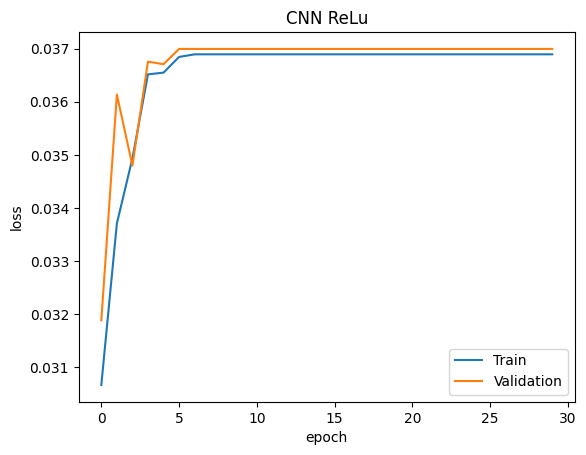

In [31]:
plt.plot(range(num_epochs), cnn_relu_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN ReLu")

plt.plot(range(num_epochs), cnn_relu_val_losses)

plt.legend(["Train", "Validation"])

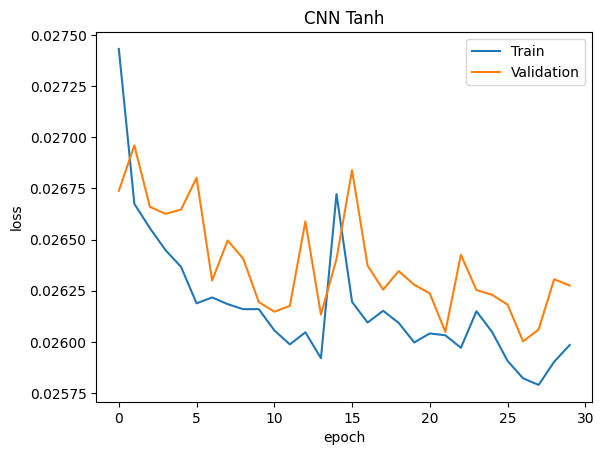

In [32]:
plt.plot(range(num_epochs), cnn_tanh_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN Tanh")

plt.plot(range(num_epochs), cnn_tanh_val_losses)

plt.legend(["Train", "Validation"])

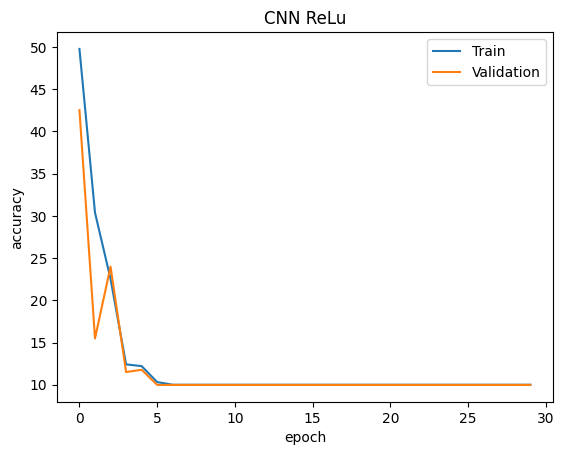

In [33]:
plt.plot(range(num_epochs), cnn_relu_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN ReLu")

plt.plot(range(num_epochs), cnn_relu_val_accs)

plt.legend(["Train", "Validation"])

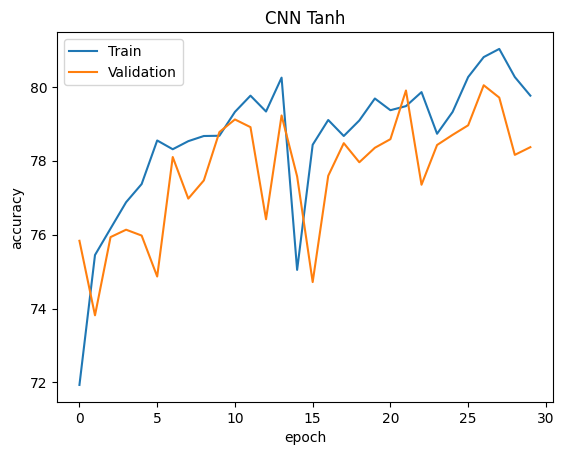

In [34]:
plt.plot(range(num_epochs), cnn_tanh_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN Tanh")

plt.plot(range(num_epochs), cnn_tanh_val_accs)

plt.legend(["Train", "Validation"])

# How can we get to highr accuracy?

# First, define the max pooling and dropout techniques, and then use them in your model to enhance the accuracy.

#Report the accuracies and plot the mentioned figures.

In [36]:
#Your code
class CNNReLUModel(nn.Module):

    def __init__(self):
        super(CNNReLUModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout1 = nn.Dropout(0.2)
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout2 = nn.Dropout(0.2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(19 * 19 * 64, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu6 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu7 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.dropout1(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = self.dropout2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.fc3(x)
        x = self.relu6(x)
        x = self.fc4(x)
        x = self.relu7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [37]:
#Your code
class CNNTanhModel(nn.Module):

    def __init__(self):
        super(CNNTanhModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.tanh1 = nn.Tanh()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.tanh2 = nn.Tanh()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout1 = nn.Dropout(0.2)
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.tanh3 = nn.Tanh()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout2 = nn.Dropout(0.2)

        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(19 * 19 * 64, 512)
        self.tanh4 = nn.Tanh()
        self.fc2 = nn.Linear(512, 256)
        self.tanh5 = nn.Tanh()
        self.fc3 = nn.Linear(256, 128)
        self.tanh6 = nn.Tanh()
        self.fc4 = nn.Linear(128, 64)
        self.tanh7 = nn.Tanh()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.tanh1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.maxpool2(x)
        x = self.dropout1(x)
        x = self.conv3(x)
        x = self.tanh3(x)
        x = self.maxpool3(x)
        x = self.dropout2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.tanh4(x)
        x = self.fc2(x)
        x = self.tanh5(x)
        x = self.fc3(x)
        x = self.tanh6(x)
        x = self.fc4(x)
        x = self.tanh7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_relu_model = CNNReLUModel().to(device)
cnn_tanh_model = CNNTanhModel().to(device)
cnn_relu_optimizer = optim.Adam(cnn_relu_model.parameters(), lr = 0.001)
cnn_tanh_optimizer = optim.Adam(cnn_tanh_model.parameters(), lr = 0.001)

In [39]:
#Your code
num_epochs = 30

cnn_relu_train_losses = []
cnn_tanh_train_losses = []

cnn_relu_train_accs = []
cnn_tanh_train_accs = []


cnn_relu_val_losses = []
cnn_tanh_val_losses = []

cnn_relu_val_accs = []
cnn_tanh_val_accs = []


for epoch in range(num_epochs):

    cnn_relu_train_loss = 0
    cnn_relu_train_acc = 0

    cnn_tanh_train_loss = 0
    cnn_tanh_train_acc = 0
    
    for images, labels in tqdm(train_dataloader, desc = f"Epoch {epoch + 1}/{num_epochs}"):

        cnn_relu_model.train(True)
        cnn_tanh_model.train(True)

        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_optimizer.zero_grad()
        cnn_tanh_optimizer.zero_grad()
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)

        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_loss.backward()
        cnn_tanh_loss.backward()
        
        cnn_relu_optimizer.step()
        cnn_tanh_optimizer.step()

        cnn_relu_train_loss += cnn_relu_loss
        cnn_tanh_train_loss += cnn_tanh_loss

        cnn_relu_train_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_train_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()

    cnn_relu_train_losses.append(cnn_relu_train_loss.item() / len(train_data))
    cnn_tanh_train_losses.append(cnn_tanh_train_loss.item() / len(train_data))

    cnn_relu_train_accs.append(cnn_relu_train_acc.item() / len(train_data) * 100)
    cnn_tanh_train_accs.append(cnn_tanh_train_acc.item() / len(train_data) * 100)        

    print("epoch =", epoch + 1)
    print("cnn_relu_train_loss =", cnn_relu_train_losses[-1], "cnn_relu_train_acc =", cnn_relu_train_accs[-1])
    print("cnn_tanh_train_loss =", cnn_tanh_train_losses[-1], "cnn_tanh_train_acc =", cnn_tanh_train_accs[-1])

    with torch.no_grad():

        cnn_relu_val_loss = 0
        cnn_tanh_val_loss = 0
        
        cnn_relu_val_acc = 0
        cnn_tanh_val_acc = 0
    
        for images, labels in val_dataloader:

            cnn_relu_model.train(False)
            cnn_tanh_model.train(False)
            
            images, labels = images.to(device), labels.to(device)
            
            cnn_relu_outputs = cnn_relu_model.forward(images)
            cnn_tanh_outputs = cnn_tanh_model.forward(images)
            
            cnn_relu_loss = criterion(cnn_relu_outputs, labels)
            cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
    
            
            cnn_relu_val_loss += cnn_relu_loss
            cnn_tanh_val_loss += cnn_tanh_loss
            
            cnn_relu_val_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
            cnn_tanh_val_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
            
        print("cnn_relu_val_loss =", cnn_relu_val_loss.item() / len(val_data), "cnn_relu_val_acc =", cnn_relu_val_acc.item() / len(val_data) * 100)
        print("cnn_tanh_val_loss =", cnn_tanh_val_loss.item() / len(val_data), "cnn_tanh_val_acc =", cnn_tanh_val_acc.item() / len(val_data) * 100)

        cnn_relu_val_losses.append(cnn_relu_val_loss.item() / len(val_data))
        cnn_tanh_val_losses.append(cnn_tanh_val_loss.item() / len(val_data))

        cnn_relu_val_accs.append(cnn_relu_val_acc.item() / len(val_data) * 100)
        cnn_tanh_val_accs.append(cnn_tanh_val_acc.item() / len(val_data) * 100)
    
#Your code

Epoch 1/30: 100%|██████████| 750/750 [00:26<00:00, 28.32it/s]


epoch = 1
cnn_relu_train_loss = 0.029851773579915364 cnn_relu_train_acc = 54.93541666666667
cnn_tanh_train_loss = 0.027494163513183595 cnn_tanh_train_acc = 71.46666666666667
cnn_relu_val_loss = 0.03269912211100261 cnn_relu_val_acc = 37.375
cnn_tanh_val_loss = 0.02774200439453125 cnn_tanh_val_acc = 69.39999999999999


Epoch 2/30: 100%|██████████| 750/750 [00:26<00:00, 28.38it/s]


epoch = 2
cnn_relu_train_loss = 0.03146732076009114 cnn_relu_train_acc = 44.71666666666667
cnn_tanh_train_loss = 0.027101615905761718 cnn_tanh_train_acc = 72.76041666666667
cnn_relu_val_loss = 0.0306798095703125 cnn_relu_val_acc = 50.25833333333334
cnn_tanh_val_loss = 0.02691058603922526 cnn_tanh_val_acc = 74.325


Epoch 3/30: 100%|██████████| 750/750 [00:26<00:00, 28.49it/s]


epoch = 3
cnn_relu_train_loss = 0.030532877604166668 cnn_relu_train_acc = 50.702083333333334
cnn_tanh_train_loss = 0.026750940958658855 cnn_tanh_train_acc = 74.8625
cnn_relu_val_loss = 0.03029260508219401 cnn_relu_val_acc = 52.76666666666666
cnn_tanh_val_loss = 0.02644739532470703 cnn_tanh_val_acc = 77.325


Epoch 4/30: 100%|██████████| 750/750 [00:26<00:00, 28.28it/s]


epoch = 4
cnn_relu_train_loss = 0.034647623697916664 cnn_relu_train_acc = 24.370833333333334
cnn_tanh_train_loss = 0.026566810607910156 cnn_tanh_train_acc = 76.11875
cnn_relu_val_loss = 0.03584188588460287 cnn_relu_val_acc = 17.349999999999998
cnn_tanh_val_loss = 0.026406097412109374 cnn_tanh_val_acc = 77.68333333333334


Epoch 5/30: 100%|██████████| 750/750 [00:26<00:00, 28.39it/s]


epoch = 5
cnn_relu_train_loss = 0.03618633015950521 cnn_relu_train_acc = 14.522916666666665
cnn_tanh_train_loss = 0.026608543395996095 cnn_tanh_train_acc = 75.76458333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026656537373860676 cnn_tanh_val_acc = 75.86666666666667


Epoch 6/30: 100%|██████████| 750/750 [00:26<00:00, 28.38it/s]


epoch = 6
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026431012471516926 cnn_tanh_train_acc = 76.87708333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02647784169514974 cnn_tanh_val_acc = 77.075


Epoch 7/30: 100%|██████████| 750/750 [00:26<00:00, 28.38it/s]


epoch = 7
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02645232137044271 cnn_tanh_train_acc = 76.78958333333334
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02631194559733073 cnn_tanh_val_acc = 78.08333333333334


Epoch 8/30: 100%|██████████| 750/750 [00:26<00:00, 28.39it/s]


epoch = 8
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02630668640136719 cnn_tanh_train_acc = 77.6625
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026723302205403646 cnn_tanh_val_acc = 75.44166666666666


Epoch 9/30: 100%|██████████| 750/750 [00:26<00:00, 28.36it/s]


epoch = 9
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02645952606201172 cnn_tanh_train_acc = 76.64583333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026475936889648437 cnn_tanh_val_acc = 77.04166666666666


Epoch 10/30: 100%|██████████| 750/750 [00:26<00:00, 28.22it/s]


epoch = 10
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026369138081868488 cnn_tanh_train_acc = 77.20833333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02663574981689453 cnn_tanh_val_acc = 76.02499999999999


Epoch 11/30: 100%|██████████| 750/750 [00:26<00:00, 28.42it/s]


epoch = 11
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026501274108886717 cnn_tanh_train_acc = 76.45416666666667
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026547757466634115 cnn_tanh_val_acc = 76.63333333333333


Epoch 12/30: 100%|██████████| 750/750 [00:26<00:00, 28.42it/s]


epoch = 12
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026397432963053385 cnn_tanh_train_acc = 77.075
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026213902791341146 cnn_tanh_val_acc = 78.70833333333334


Epoch 13/30: 100%|██████████| 750/750 [00:26<00:00, 28.31it/s]


epoch = 13
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026278714497884114 cnn_tanh_train_acc = 77.80625
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02608856455485026 cnn_tanh_val_acc = 79.51666666666667


Epoch 14/30: 100%|██████████| 750/750 [00:26<00:00, 28.27it/s]


epoch = 14
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02606482187906901 cnn_tanh_train_acc = 79.20208333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026222038269042968 cnn_tanh_val_acc = 78.675


Epoch 15/30: 100%|██████████| 750/750 [00:26<00:00, 28.35it/s]


epoch = 15
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026155962626139322 cnn_tanh_train_acc = 78.6125
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026635162353515623 cnn_tanh_val_acc = 76.08333333333334


Epoch 16/30: 100%|██████████| 750/750 [00:26<00:00, 28.36it/s]


epoch = 16
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02613245900472005 cnn_tanh_train_acc = 78.77916666666667
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026348612467447918 cnn_tanh_val_acc = 77.86666666666666


Epoch 17/30: 100%|██████████| 750/750 [00:26<00:00, 28.31it/s]


epoch = 17
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02601617177327474 cnn_tanh_train_acc = 79.55208333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02620337422688802 cnn_tanh_val_acc = 78.79166666666667


Epoch 18/30: 100%|██████████| 750/750 [00:26<00:00, 28.36it/s]


epoch = 18
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.025974024454752605 cnn_tanh_train_acc = 79.825
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02629990895589193 cnn_tanh_val_acc = 78.21666666666667


Epoch 19/30: 100%|██████████| 750/750 [00:26<00:00, 28.38it/s]


epoch = 19
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02605785624186198 cnn_tanh_train_acc = 79.26458333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026443476359049478 cnn_tanh_val_acc = 77.23333333333333


Epoch 20/30: 100%|██████████| 750/750 [00:26<00:00, 28.37it/s]


epoch = 20
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026055643717447917 cnn_tanh_train_acc = 79.23750000000001
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02619780985514323 cnn_tanh_val_acc = 78.86666666666666


Epoch 21/30: 100%|██████████| 750/750 [00:26<00:00, 28.37it/s]


epoch = 21
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02611407216389974 cnn_tanh_train_acc = 78.9125
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026036534627278646 cnn_tanh_val_acc = 79.80000000000001


Epoch 22/30: 100%|██████████| 750/750 [00:26<00:00, 28.37it/s]


epoch = 22
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.025923075358072915 cnn_tanh_train_acc = 80.13125
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02600257364908854 cnn_tanh_val_acc = 80.06666666666666


Epoch 23/30: 100%|██████████| 750/750 [00:26<00:00, 28.39it/s]


epoch = 23
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026114667256673177 cnn_tanh_train_acc = 78.91458333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026370374043782552 cnn_tanh_val_acc = 77.66666666666666


Epoch 24/30: 100%|██████████| 750/750 [00:26<00:00, 28.25it/s]


epoch = 24
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02624009958902995 cnn_tanh_train_acc = 78.16875
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02623412068684896 cnn_tanh_val_acc = 78.58333333333334


Epoch 25/30: 100%|██████████| 750/750 [00:26<00:00, 28.36it/s]


epoch = 25
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02607288106282552 cnn_tanh_train_acc = 79.17916666666667
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026503094991048175 cnn_tanh_val_acc = 76.91666666666667


Epoch 26/30: 100%|██████████| 750/750 [00:26<00:00, 28.39it/s]


epoch = 26
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026134732564290365 cnn_tanh_train_acc = 78.78541666666666
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026435335795084634 cnn_tanh_val_acc = 77.34166666666667


Epoch 27/30: 100%|██████████| 750/750 [00:26<00:00, 28.38it/s]


epoch = 27
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026105623881022135 cnn_tanh_train_acc = 79.00625
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02626531473795573 cnn_tanh_val_acc = 78.50833333333334


Epoch 28/30: 100%|██████████| 750/750 [00:26<00:00, 28.36it/s]


epoch = 28
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026005910237630207 cnn_tanh_train_acc = 79.64166666666667
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.026414794921875 cnn_tanh_val_acc = 77.35833333333333


Epoch 29/30: 100%|██████████| 750/750 [00:26<00:00, 28.43it/s]


epoch = 29
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.026183222452799478 cnn_tanh_train_acc = 78.45208333333333
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.0261496098836263 cnn_tanh_val_acc = 79.03333333333333


Epoch 30/30: 100%|██████████| 750/750 [00:26<00:00, 28.44it/s]


epoch = 30
cnn_relu_train_loss = 0.036878074645996094 cnn_relu_train_acc = 10.095833333333333
cnn_tanh_train_loss = 0.02597230784098307 cnn_tanh_train_acc = 79.84791666666666
cnn_relu_val_loss = 0.03705282338460286 cnn_relu_val_acc = 9.616666666666667
cnn_tanh_val_loss = 0.02595147705078125 cnn_tanh_val_acc = 80.4


In [40]:
cnn_relu_test_loss = 0
cnn_tanh_test_loss = 0

cnn_relu_test_acc = 0
cnn_tanh_test_acc = 0

with torch.no_grad():
    
    for images, labels in test_dataloader:

        cnn_relu_model.train(False)
        cnn_tanh_model.train(False)
        
        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)
        
        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_test_loss += cnn_relu_loss
        cnn_tanh_test_loss += cnn_tanh_loss
        
        cnn_relu_test_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_test_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
        
    print("cnn_relu_test_loss =", cnn_relu_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_relu_test_acc.item() / len(test_data) * 100)
    print("cnn_tanh_test_loss =", cnn_tanh_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_tanh_test_acc.item() / len(test_data) * 100)


cnn_relu_test_loss = 0.03706350708007813 cnn_test_acc = 10.0
cnn_tanh_test_loss = 0.0260115478515625 cnn_test_acc = 80.44


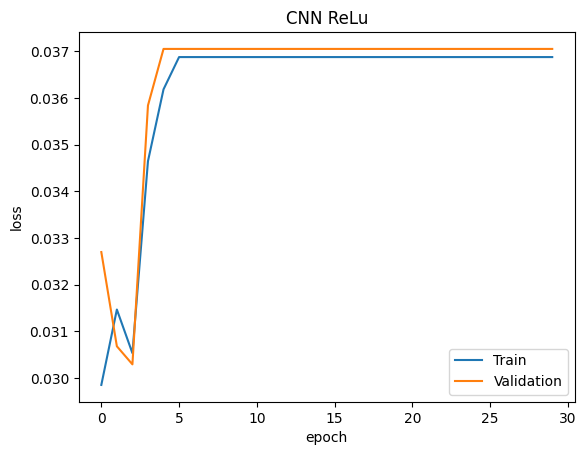

In [41]:
plt.plot(range(num_epochs), cnn_relu_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN ReLu")

plt.plot(range(num_epochs), cnn_relu_val_losses)

plt.legend(["Train", "Validation"])

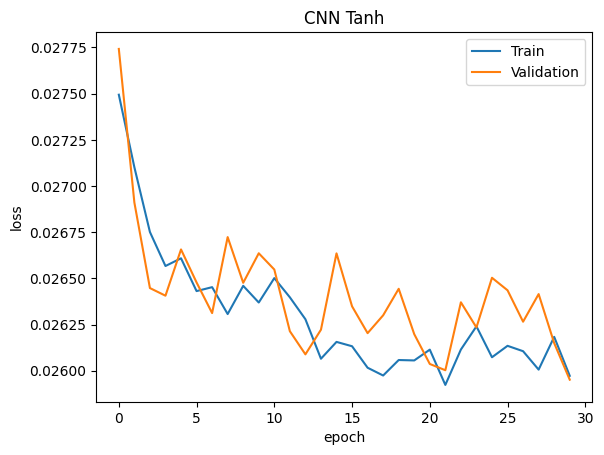

In [42]:
plt.plot(range(num_epochs), cnn_tanh_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN Tanh")

plt.plot(range(num_epochs), cnn_tanh_val_losses)

plt.legend(["Train", "Validation"])

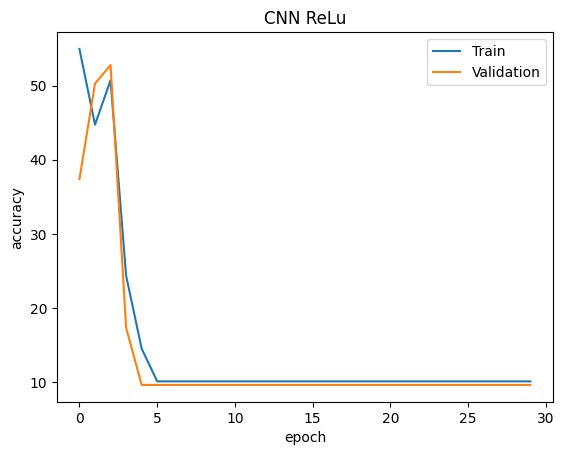

In [43]:
plt.plot(range(num_epochs), cnn_relu_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN ReLu")

plt.plot(range(num_epochs), cnn_relu_val_accs)

plt.legend(["Train", "Validation"])

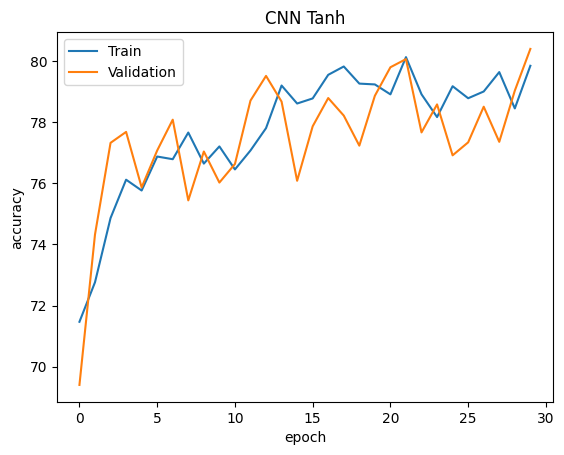

In [44]:
plt.plot(range(num_epochs), cnn_tanh_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN Tanh")

plt.plot(range(num_epochs), cnn_tanh_val_accs)

plt.legend(["Train", "Validation"])